<h1><center> MACHINE LEARNING ON SONAR DATASET<h1> 
    
    
   

                                                                                                  -Avinash Shan Monteiro

<img align="center" src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F939119258%2F960x0.jpg%3Ffit%3Dscale" />

## Table of Contents

1. [Introduction](#section1)<br>
    - 1.1[Sonar Technology](#section11)<br>
    - 1.2[Data Set Information](#section12)<br>
2. [Problem Statement](#section2)<br>
3. [Selecting the important Python libraries](#section3)<br>
4. [Data Loading and Description](#section4)<br>
    - 4.1[Data Loading](#section41)<br> 
    - 4.2[Description of the data](#section42)<br> 
5. [Exploratory Data Analysis](#section5)<br>
    - 5.1[Re-engineering the Target Variable column](#section51)<br>
    - 5.2[Understanding the Distribution of independent variables](#section52)<br>
    - 5.3[Target Variable Analysis](#section53)<br>
    - 5.4[Pandas Profiling](#section54)<br>
6. [Dimensionality Reduction](#section6)<br>
    - 6.1[Variance Mentod](#section61)<br>
    - 6.2[ Scaling the dataset](#section62)<br>
    - 6.3[Principal Components Analysis](#section63)<br>
7. [Train Test Split](#section7)<br>
8. [Machine Learning Models](#section8)<br>
    - 8.1[Logistic Regression](#section81)<br>
    - 8.2[Decision Tree](#section82)<br>
    - 8.3[Random Forest Regression](#section83)<br>
    - 8.4[Naive Bayes Classifier](#section84)<br>
    - 8.5[Support Vector Classifier](#section85)<br>
    - 8.6[K Nearest Neighbor](#section86)<br>
9. [Final Summary](#section9)<br>        


# 1. INTRODUCTION
<a id=section1></a>

<img align="center" src="https://previews.123rf.com/images/pattarawit/pattarawit1707/pattarawit170700007/82308579-sonar-signal-systems-are-generally-used-underwater-for-range-finding-and-detection-active-sonar-emit.jpg" />

## 1.1 Sonar Technology
<a id=section11></a>

**Sonar (sound navigation and ranging)** is a technology that uses acoustical waves to sense the location of objects in the ocean. The simplest sonar devices send out a sound pulse from a transducer, and then precisely measure the time it takes for the sound pulses to be reflected back to the transducer. The distance to an object can be calculated using this time difference and the speed of sound in the water (approximately 1,500 meters per second). More sophisticated sonar systems can provide additional direction and range information. Sonar was developed during World War I as an aid in finding both submarines and icebergs. Major improvements were made on this technology during World War II, and eventually scientists adapted the highly sensitive equipment for use in oceanographic research.

<img src='https://dosits.org/wp-content/uploads/2017/07/anime66.gif' align ='center'/>

There are two types of sonar: **active and passive**. 
#### Active Sonar
**Active sonar** transducers emit an acoustic signal or pulse of sound into the water. If an object is in the path of the sound pulse, the sound bounces off the object and returns an “echo” to the sonar transducer. If the transducer is equipped with the ability to receive signals, it measures the strength of the signal. By determining the time between the emission of the sound pulse and its reception, the transducer can determine the range and orientation of the object.

#### Passive Sonar
**Passive sonar** systems are used primarily to detect noise from marine objects (such as submarines or ships) and marine animals like whales. Unlike active sonar, passive sonar does not emit its own signal, which is an advantage for military vessels that do not want to be found or for scientific missions that concentrate on quietly “listening” to the ocean. Rather, it only detects sound waves coming towards it. Passive sonar cannot measure the range of an object unless it is used in conjunction with other passive listening devices. Multiple passive sonar devices may allow for triangulation of a sound source.


## 1.2 Data Set Information
<a id=section12></a>

The file ``"sonar_dataset.csv"`` contains 208 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter **"R"** if the object is a rock and **"M"** if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

# 2. Problem Statement
<a id=section2></a>

- By analysing the dataset file ```dataset.csv``` we need to develop a model which could predict whether an object is a rock or a metal mine accurately.
- The model should make least error in determining the Mine as it could lead to explosion and damage to the submarine, if the submarine passes over a mine. 

# 3. Selecting the important Python libraries
<a id=section3></a>

In [1]:
#!pip install matplotlib

In [2]:
import pandas as pd #Python library to import the dataset and work on it
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import numpy as np # Python library to perform mathematical operations on the dataset
import matplotlib.pyplot as plt #Python library to plot the graphs
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') #to ignore the errors which doesnt affect the output

In [3]:
import seaborn as sns #Python library to plot the graph
sns.set(style="darkgrid", font_scale=1, color_codes=True)
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
from pandas_profiling import ProfileReport

# 4. Data Loading and Description 
<a id=section4></a>

## 4.1 Data Loading
<a id=section41></a>

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Avinash-Monteiro/Datasets/master/Sonar_dataset.csv')

The data is successfully loaded from ```Github``` repository and now we can view the data by using ```.head()``` function of pandas 

In [5]:
df.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,...,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,...,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,...,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,...,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,...,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## 4.1 Description of the data
<a id=section42></a>

In [6]:
len(df.columns)

61

There are 61 columns in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      208 non-null    float64
 1   v2      208 non-null    float64
 2   v3      208 non-null    float64
 3   v4      208 non-null    float64
 4   v5      208 non-null    float64
 5   v6      208 non-null    float64
 6   v7      208 non-null    float64
 7   v8      208 non-null    float64
 8   v9      208 non-null    float64
 9   v10     208 non-null    float64
 10  v11     208 non-null    float64
 11  v12     208 non-null    float64
 12  v13     208 non-null    float64
 13  v14     208 non-null    float64
 14  v15     208 non-null    float64
 15  v16     208 non-null    float64
 16  v17     208 non-null    float64
 17  v18     208 non-null    float64
 18  v19     208 non-null    float64
 19  v20     208 non-null    float64
 20  v21     208 non-null    float64
 21  v22     208 non-null    float64
 22  v2

- As breifed in the **Dataset Information** section, the dataset contains a total of  **61 columns/features**. **60** features are continous in nature starting from **v1 to v60** and the last feature, **the target variable, Class** is categorical in nature.
- the dataset seems to be clean. That means there are no missing values in the dataset.

In [8]:
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,...,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,...,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,...,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,...,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,...,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,...,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,...,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.068525,0.025275,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,0.734200,0.706000,0.713100,0.997000,1.000000,0.998800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.949700,1.000000,0.985700,0.929700,0.899500,0.824600,0.773300,0.776200,0.703400,0.729200,0.552200,0.333900,0.198100,0.082500,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


From the ```df.describe()``` function, it looks like the dataset doesn't have any outliers.

# 5. Exploratory Data Analysis
<a id=section5></a>

## 5.1 Re-engineering the Target Variable column:
<a id=section51></a>

#### Rock, R is give the value 0 and Mine, M is given the value 1

In [9]:
A=df['Class']
A=list(A)
print(len(A))

208


In [10]:
i=0
B=[]
while i<208:
    if A[i]==str('R'):
        B.append(0)
    else:
        B.append(1)
    i+=1
print(len(A))
print(len(B))
print(A,B)

208
208
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', '

In [11]:
df3 =pd.DataFrame(B)
df3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [12]:
df['Target']=df3

In [13]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,...,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,Class,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,...,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,...,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,...,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,...,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


## 5.2 Understanding the Distribution of independent variables
<a id=section52></a>

In [14]:
columns=list(df.columns[:60])

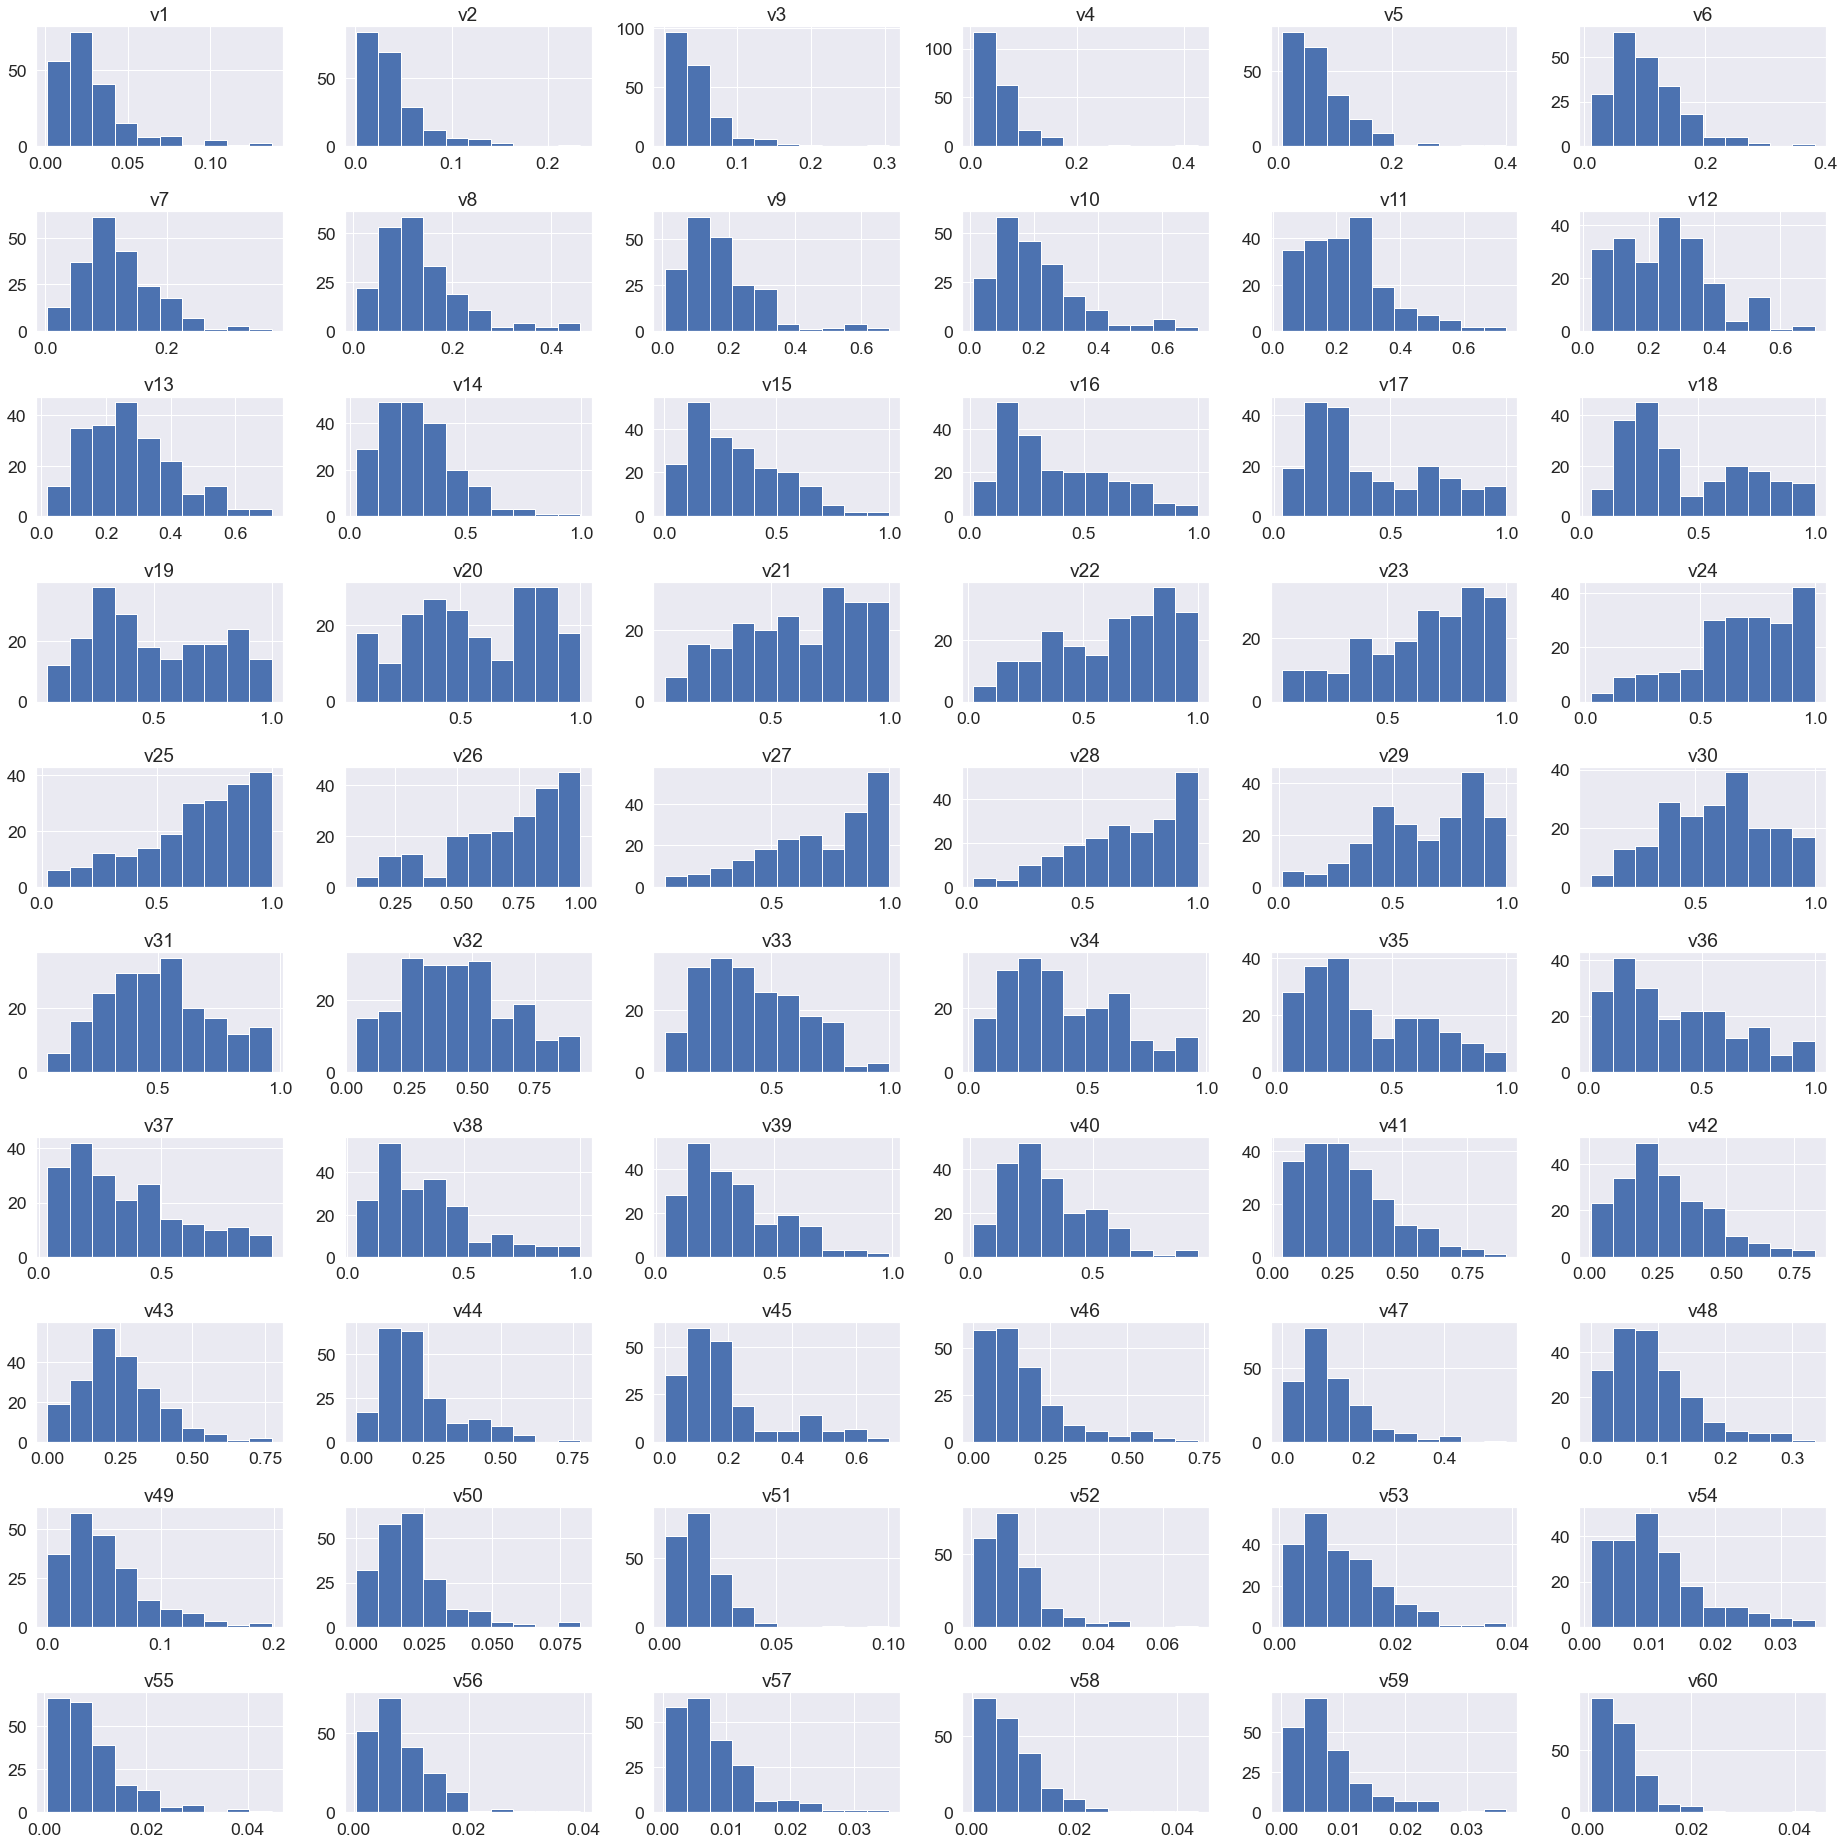

In [15]:
sns.set(style="darkgrid", font_scale=1.6, color_codes=True)
plt.figure(figsize=(26,26))
i=1
while i<=60:
    plt.subplot(10,6,i, )
    plt.hist(df[columns[i-1]])
    plt.title(columns[i-1])
    plt.tight_layout()
    i+=1

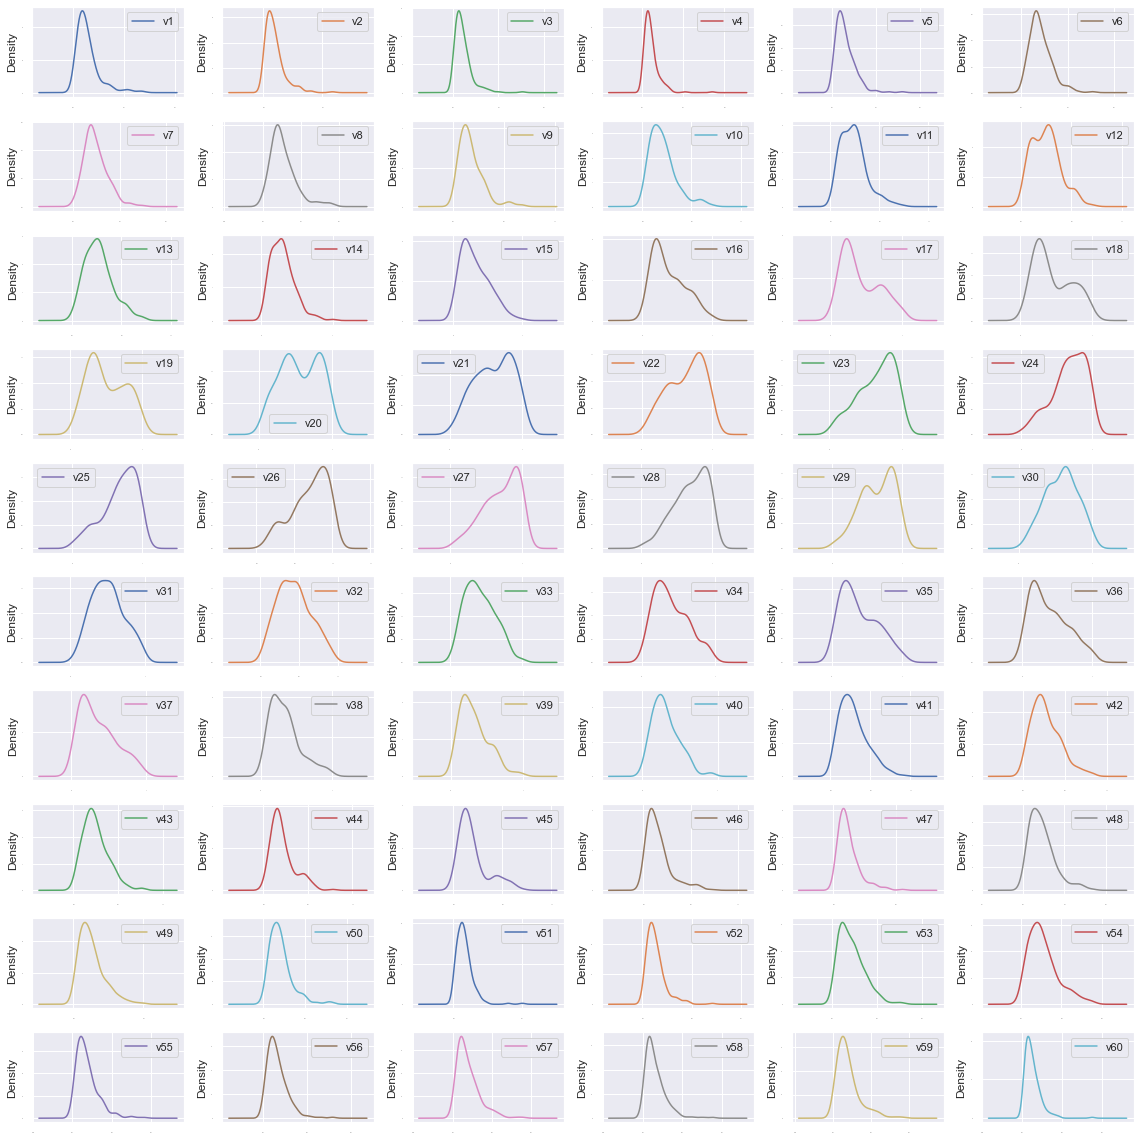

In [16]:
sns.set(style="darkgrid", font_scale=1, color_codes=True)
df[columns].plot(kind='density', subplots=True, layout=(10,6), sharex=False, legend=True, fontsize=1, figsize=(16,16))
plt.tight_layout()
plt.show()

From the above subplots we notice that all the variables are varying in between the range of 0 to a maximum value of 1. There are no outliers in the data. 

## 5.3 Target Variable Analysis
<a id=section53></a>

Let us check plot a count plot to study the balance of Target Variable

<AxesSubplot:xlabel='Class', ylabel='count'>

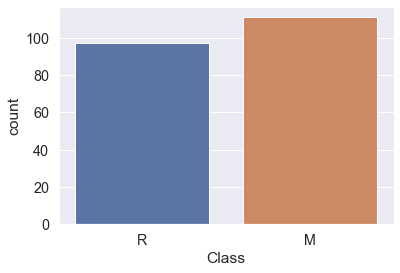

In [17]:
sns.set(style="darkgrid", font_scale=1.3, color_codes=True)
sns.countplot(df['Class'])

From the above plot it is clear to us that the dataset is neatly balanced

## 5.4 Pandas Profiling
<a id=section54></a>

We will cary out a quick pandas profiling and understand if the dataset has any anomilies

In [18]:
profile=ProfileReport(df, minimal=True,explorative=True)

In [19]:
profile.to_file('sonar_dataset_pandas_profiling.html')

### Summary from Pandas Profile Report

- There are no missing and duplicate values
- Column ```V42``` has 100% unique values
- Out of the two Classes , Rock and Meine, Mine data is slightly more than Rock data

# 6. Dimensionality Reduction
<a id=section6></a>

Since the dataset comtains 60 independent variables, it is very difficult to build our ML prediction model with such huge columns.

Therefore in order to carry out our analysis and understand the features, we need to carry our dimensionaly reduction and drop few features which are not very important for our model.

We will carry out dimensionality reduction in two ways;
- first by removing the columns which dont have any variance. If the column dont have any variation, then the column is not useful for our model.
- Second by doin PCA(Principal Component Analysis on the balance independent variable columns

### Selection of the features for Dimensionality Reduction

In [20]:
features=list(df.columns)
features.remove('Class')
features.remove('Target')
print(features)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60']


In [21]:
df[features].head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,...,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,...,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,...,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,...,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,...,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [22]:
df1=df[features].copy()

## 6.1 Variance Method
<a id=section61></a>

In [23]:
drop_cols=[]
for cols in df1.columns:
    if df1[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
df1.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


We couldn't extract any column with 0 variance as none of the columns has standard deviation 0

## 6.2 Scaling the dataset
<a id=section62></a>

Before we move forward with **Model development** we need to scale the data to have all the columns inline with each other. Eventhough the dataset values looks okay for model development, still we will scale it for better understanding 

### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)

StandardScaler()

In [25]:
df1_s=scaler.transform(df1)

In [26]:
df1_s

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [27]:
df1_s=pd.DataFrame(df1_s)
df1_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,-0.567382,-0.658541,-0.352043,-1.414373,-1.240416,-0.651413,-0.402913,-0.584202,0.011612,-0.318092,-0.119597,-0.459029,-0.858165,-0.493225,-0.017695,...,1.768039,1.276008,1.271024,0.848461,-0.206511,-1.395741,0.030339,0.259328,1.590771,0.442062,-0.164885,-0.200048,0.688588,-0.379978,0.878510,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,1.932142,2.898195,2.976719,2.944515,2.079703,2.438336,2.220238,1.667619,1.156279,0.834871,-0.341605,-0.858218,-1.006818,-1.179062,-1.434182,...,0.126582,0.082283,-1.101179,-0.714012,-0.640777,-0.713840,-1.306977,-0.767653,-0.385613,-0.893356,-1.050261,-0.800670,-0.276618,-0.307489,-1.050756,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,3.000992,3.261740,1.998926,1.434872,1.599057,1.355566,0.988117,1.160528,1.507916,1.140572,0.732277,0.193621,-0.872189,-1.290573,-0.582489,...,-0.305701,1.035341,1.581199,1.065989,0.901598,1.027820,-0.116403,-0.242623,0.061104,0.091680,-1.070468,0.142341,-0.273406,-1.085353,-0.720654,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,-1.117292,-0.365128,-1.812688,-0.429479,-0.718781,-0.712596,-1.317974,-0.859403,-0.383932,-0.632571,-1.302345,-1.000030,-0.366125,-0.788353,-1.479201,...,-0.317466,0.739521,2.549849,3.322838,3.397228,1.891327,1.320721,0.536988,0.798111,1.535517,1.532522,1.649083,1.062786,0.450859,0.658442,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,1.353527,1.037528,1.083001,0.712657,0.647036,0.664024,1.196069,0.640022,-1.171910,-0.379537,-0.755295,-0.764199,-0.296406,-0.556527,-1.470607,...,0.126202,0.403590,-0.084520,-0.216518,-0.382686,-0.535163,-0.201359,-0.446000,-0.977475,-0.846418,-0.807026,-1.000109,-1.331760,-0.806549,-1.160790,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


## 6.3 Principal Component Analysis
<a id=section63></a>

**Principal component analysis (PCA)** is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In order to get the principal components, let us first plot % variance v/s number of features in order to estimate how many features are giving least variation ad plant to drop them.

In [28]:
from sklearn.decomposition import PCA #import library
pca = PCA(n_components=60).fit(df1_s) #define the object

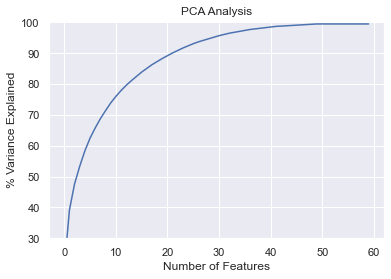

In [29]:
sns.set(style="darkgrid", font_scale=1, color_codes=True)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

From the above plot, we can see that out of the 60 independent features, 30 features contributes to 95% of the variance in the data and the balance 5% of variation is contributed by the balance 30 features. In other words, we can see that the first 30 Principal Components attribute for about 95% variation in the data.So let us drop these balance 30 features and move forward with our analysis.


**Doing this PAC operation on independent variables has reduced 30 features from the dataset thus reducing the computational time.**

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30).fit(df1_s) #selecting only 30 important features

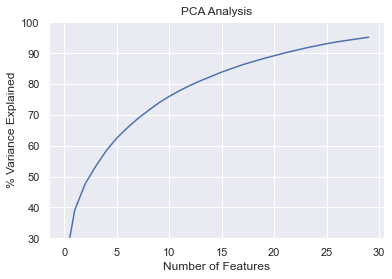

In [31]:
sns.set(style="darkgrid", font_scale=1, color_codes=True)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [32]:
print('%d components explain 95%% of the variation in the data' % pca.n_components_)

30 components explain 95% of the variation in the data


### Making the DataFrame of the selected 30 features

In [33]:
df2=pca.transform(df1)
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.604376,-0.141393,0.531054,0.791812,-1.545774,1.368703,-0.863437,-0.388407,-0.044329,0.262680,-0.994720,0.336583,0.077931,-0.030666,-0.456396,0.172122,0.104097,0.318855,-0.174226,0.367362,0.220613,-0.254823,-0.322413,-0.280098,-0.183170,-0.272401,-0.001103,-0.049510,-0.038647,-0.108226
1,0.125478,1.534695,0.580445,0.960974,-1.174978,0.185667,-1.465830,-0.082520,-0.033734,0.157969,-0.933278,0.076945,-0.004945,-0.112804,-0.327737,0.460089,-0.072690,0.090297,-0.121612,0.171662,0.156674,-0.149023,-0.195847,-0.142248,-0.131117,-0.196488,0.076537,-0.106483,0.014044,-0.072052
2,0.645527,1.024859,0.874958,1.443300,-1.471680,0.673121,-1.472783,-0.349277,-0.139083,0.472565,-1.133631,0.366538,-0.399172,-0.015037,-0.481330,0.892712,-0.324920,-0.000701,-0.080404,0.001502,0.271390,-0.315944,-0.311593,0.032287,0.021460,-0.284245,0.206112,-0.045117,0.071149,0.015709
3,1.139261,-0.272673,0.436824,0.509703,-1.681391,0.777905,-0.867519,0.063203,-0.130756,0.090579,-0.537746,0.216672,-0.446746,-0.178506,-0.452074,0.348211,-0.367846,-0.517481,0.131558,-0.183860,0.194381,0.050707,-0.467808,-0.013428,-0.226313,-0.289405,0.116773,-0.134201,0.167206,0.083739
4,0.253626,0.483900,0.881898,0.965239,-0.899255,0.673088,-1.240591,-0.258630,-0.025030,0.194163,-1.065238,0.131450,-0.114913,-0.074007,-0.515866,0.740729,-0.212542,-0.016901,-0.178390,0.001093,0.300175,-0.147390,-0.273871,0.079250,-0.079087,-0.069195,-0.010102,-0.081536,-0.282579,-0.234371


# 7. Train Test Split
<a id=section7></a>

Before we move forward with **Scaling the Dataset and Model Development** let us divide the dataset for Train and Test data.
- We will use Train data to develop the model
- We will use Test data as tomorrow's unknown data to test our model behaviour

In [34]:
X=df2.copy()
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.604376,-0.141393,0.531054,0.791812,-1.545774,1.368703,-0.863437,-0.388407,-0.044329,0.262680,-0.994720,0.336583,0.077931,-0.030666,-0.456396,0.172122,0.104097,0.318855,-0.174226,0.367362,0.220613,-0.254823,-0.322413,-0.280098,-0.183170,-0.272401,-0.001103,-0.049510,-0.038647,-0.108226
1,0.125478,1.534695,0.580445,0.960974,-1.174978,0.185667,-1.465830,-0.082520,-0.033734,0.157969,-0.933278,0.076945,-0.004945,-0.112804,-0.327737,0.460089,-0.072690,0.090297,-0.121612,0.171662,0.156674,-0.149023,-0.195847,-0.142248,-0.131117,-0.196488,0.076537,-0.106483,0.014044,-0.072052
2,0.645527,1.024859,0.874958,1.443300,-1.471680,0.673121,-1.472783,-0.349277,-0.139083,0.472565,-1.133631,0.366538,-0.399172,-0.015037,-0.481330,0.892712,-0.324920,-0.000701,-0.080404,0.001502,0.271390,-0.315944,-0.311593,0.032287,0.021460,-0.284245,0.206112,-0.045117,0.071149,0.015709
3,1.139261,-0.272673,0.436824,0.509703,-1.681391,0.777905,-0.867519,0.063203,-0.130756,0.090579,-0.537746,0.216672,-0.446746,-0.178506,-0.452074,0.348211,-0.367846,-0.517481,0.131558,-0.183860,0.194381,0.050707,-0.467808,-0.013428,-0.226313,-0.289405,0.116773,-0.134201,0.167206,0.083739
4,0.253626,0.483900,0.881898,0.965239,-0.899255,0.673088,-1.240591,-0.258630,-0.025030,0.194163,-1.065238,0.131450,-0.114913,-0.074007,-0.515866,0.740729,-0.212542,-0.016901,-0.178390,0.001093,0.300175,-0.147390,-0.273871,0.079250,-0.079087,-0.069195,-0.010102,-0.081536,-0.282579,-0.234371


In [35]:
X.shape

(208, 30)

In [36]:
y=pd.DataFrame(df['Target'])
y.head(2)

,Target
0,0
1,0


In [37]:
y.shape

(208, 1)

In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [39]:
X_train.shape

(156, 30)

The train dataset of independent features has 156 rows

In [40]:
y_train.shape

(156, 1)

In [41]:
X_test.shape

(52, 30)

The test dataset of independent features has 52 rows

In [42]:
y_test.shape

(52, 1)

# 8 Machine Learning Models
<a id=section8></a>

Now we are ready with our data to develop few models for Machine Learning. Let us develop various Machine Learning Models starting with a Logistic Regression Model and understand the results from them.

To start with, we ill first develop simple Machine Learning Model adn check for the accuracy to deduce if the model is overfitted or underfitted. After that we will use the technique of **hyper parameter tuning** and tune the existing model inot a better model. Once it is done, we will evaluate this model and find out the accuracy, Recall Score and also plot the confusion matrix.

## 8.1 Logistic Regression
<a id=section81></a>

In [43]:
from sklearn.linear_model import LogisticRegression #model importing
logreg=LogisticRegression() #defins object
logreg.fit(X_train, y_train) #training the function

LogisticRegression()

Printing the co-efficients

In [44]:
print('The co-efficients of Logistic regression models are:\n',logreg.coef_)

The co-efficients of Logistic regression models are:
 [[ 1.29885551e+00  8.70476365e-01  2.55601538e+00  5.38709699e-01
  -7.14965103e-01  5.29295210e-02  8.01232079e-01  3.29996685e-01
  -1.40761895e+00  9.49091321e-01  1.13987871e-01 -2.37747376e-01
  -3.03227356e-01  8.33776335e-01  5.24184288e-01 -1.48152637e-01
   1.73787215e-01  5.19311373e-01  3.53229331e-01 -4.51128831e-02
   1.72798257e-01 -4.20286691e-01  3.66658843e-01  1.81063639e-01
  -4.93436869e-02  1.40152729e-04 -3.38536705e-01 -4.02489759e-01
  -1.79114322e-01 -1.05602369e-01]]


Printing Intercept

In [45]:
print('The intercept of Logistic Regression model is : ',logreg.intercept_[0])

The intercept of Logistic Regression model is :  -3.002173405995333


Predicting the train and test outputs from the model

In [46]:
y_pred_train_lr=logreg.predict(X_train)
y_pred_test_lr=logreg.predict(X_test)

### Devoloping Model Evaluation technique

#### 1. Model Accuracy

<img align="center" src='https://miro.medium.com/max/563/1*CcRTQCFaGLzPid_994JsTQ.png' />

In [47]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train dataset is :',accuracy_score(y_train,y_pred_train_lr))
print('Accuracy score for test dataset is :',accuracy_score(y_test,y_pred_test_lr))

Accuracy score for train dataset is : 0.8333333333333334
Accuracy score for test dataset is : 0.8269230769230769


**Understanding the confusion matrix for the present dataset and checking what to optimize**

<img align="center" src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width='400' />



From the above graph on confusion matrix we can define the following for the present dataset;
- **False Positive** Actally it is a Rock but predicted as Mine: This will lead to loss of time as the Ship/Submarine needs to change the course of journey. We can tollerete FPs in this case.
- **False Negative** Actual it is Mine but detected as Rock : This will lead to ship/Submarine passing over a mine and casuses catestropic disaster. This is very dangerous and need to be minimised.We cannot tollerate any occurance of FNs.

<img align="center" src='https://miro.medium.com/max/1403/1*szkTUgN5XmguA4c39YAKPQ.png' width='350'/>

**Precision and Recall**

**Precision** — Also called Positive predictive value. The ratio of correct positive predictions to the total predicted positives.

<img align="center" src='https://miro.medium.com/max/375/1*7pXTS_beJfTlkntFHiBh7g.png' width='250'/>

**Recall** — Also called Sensitivity, Probability of Detection, True Positive Rate. The ratio of correct positive predictions to the total actual positive values.

<img align='center' src='https://miro.medium.com/max/375/1*VWD0-yDiy5gBZy7ZTIZgXg.png' width='250' />





Therfore from the above argument, we can say that we need to optimize **Recall** instead of **Accuracy**. We need to improve the recall of every model in order to develop a working class model.



#### Recall Score

In [48]:
from sklearn.metrics import recall_score
print('Recall Score for the simple Logistic Regression model for train dataset is',recall_score(y_train, y_pred_train_lr))
print('Recall Score for the simple Logistic Regression model for test dataset is',recall_score(y_test, y_pred_test_lr))

Recall Score for the simple Logistic Regression model for train dataset is 0.8641975308641975
Recall Score for the simple Logistic Regression model for test dataset is 0.8


let us now carry out the hyperparameter tuning and develop an optimized model. While optimizing the model, we need to use recall instead of Accuracy score as Recall score is the tight key for better model.

Let us calcuate **Recall Score** for these optimized model and identiy the best model.

### Hyper Parameter Tuning

We will try to get the best accuracy from the Logistic Regression model by iterating over different probaility values the model during prediction stage.

In [49]:
i=0.39
while i<=0.90:
    pred_lr=np.where(logreg.predict_proba(X_train)[:,1]>i,1,0)
    print('Recall score for train data with probability',i,'is :',recall_score(y_train,pred_lr))
    i=i+0.05

Recall score for train data with probability 0.39 is : 0.9506172839506173
Recall score for train data with probability 0.44 is : 0.9135802469135802
Recall score for train data with probability 0.49 is : 0.8641975308641975
Recall score for train data with probability 0.54 is : 0.7654320987654321
Recall score for train data with probability 0.5900000000000001 is : 0.6049382716049383
Recall score for train data with probability 0.6400000000000001 is : 0.48148148148148145
Recall score for train data with probability 0.6900000000000002 is : 0.38271604938271603
Recall score for train data with probability 0.7400000000000002 is : 0.2962962962962963
Recall score for train data with probability 0.7900000000000003 is : 0.2345679012345679
Recall score for train data with probability 0.8400000000000003 is : 0.18518518518518517
Recall score for train data with probability 0.8900000000000003 is : 0.1111111111111111


From the above output, we can notice that for probability of >40% we have maximum Recall of 0.938 on train data.

In [50]:
pred_lr_test=np.where(logreg.predict_proba(X_test)[:,1]>0.40,1,0)
pred_lr_train=np.where(logreg.predict_proba(X_train)[:,1]>0.40,1,0)
print('Recall score for train data with probability',0.40,'is :',recall_score(y_train,pred_lr_train))
print('Recall score for test data with probability',0.40,'is :',recall_score(y_test,pred_lr_test))

Recall score for train data with probability 0.4 is : 0.9382716049382716
Recall score for test data with probability 0.4 is : 0.9666666666666667


### Model Evaluation

#### Accuracy Score

In [51]:
pred_lr=np.where(logreg.predict_proba(X_test)[:,1]>0.40,1,0)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_lr))

0.8269230769230769


#### Confusion Matrix

For Train dataset:

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_train, pred_lr_train))
confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

             predicted Rock  predicted Mine
Actual Rock              44              31
Actual Mine               5              76


For the test dataset:

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred_lr))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

             predicted Rock  predicted Mine
Actual Rock              14               8
Actual Mine               1              29


Eventhough the recall score was poor for train dataset, this model gave excellent recall score for test model

## 8.2 Decision Tree
<a id=section82></a>

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier( criterion='gini')
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred_train_dt=model_dt.predict(X_train)
y_pred_test_dt=model_dt.predict(X_test)

#### Recall Score

In [56]:
from sklearn.metrics import accuracy_score
print('Recall score for train data is:', recall_score(y_train, y_pred_train_dt))
print('Recall score for test data is:', recall_score(y_test, y_pred_test_dt))

Recall score for train data is: 1.0
Recall score for test data is: 0.6


Clearly we can say that this model is **Overfitted**. We need to hypertune the inpiuts and develop and better Decision tree model.

### Hyperparameter Tuning

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [58]:
y_pred_train_dt2 = grid_search.predict(X_train)
y_pred_test_dt2 = grid_search.predict(X_test)

### Model Evaluation

#### 1. Recall Score

In [59]:
from sklearn.metrics import recall_score
print('Recall score for train data is:', recall_score(y_train, y_pred_train_dt2))
print('Recall score for test data is:', recall_score(y_test, y_pred_test_dt2))

Recall score for train data is: 0.8148148148148148
Recall score for test data is: 0.7333333333333333


#### 2. Accuracy Score

In [60]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data after GridSearchCV is:', accuracy_score(y_train, y_pred_train_dt2))
print('Accuracy score for test data after GridSearchCV is:', accuracy_score(y_test, y_pred_test_dt2))

Accuracy score for train data after GridSearchCV is: 0.7564102564102564
Accuracy score for test data after GridSearchCV is: 0.7307692307692307


#### 3. Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_train , y_pred_train_dt2))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

             predicted Rock  predicted Mine
Actual Rock              52              23
Actual Mine              15              66


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt2))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

             predicted Rock  predicted Mine
Actual Rock              16               6
Actual Mine               8              22


#### Plotting the Tree

In [63]:
#Importing libraries for visvalizing the Tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
#importing OS
import os
os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

In [ ]:
#Generating DOT File
dot_data = export_graphviz(model_dt, filled=True, rounded=True, feature_names=X.columns, out_file=None)
graph = graph_from_dot_data(dot_data)

In [ ]:
#Converting DOT to PNG File
graph.write_png('tree.png')

In [ ]:
from PIL import Image  
# creating a object  
im = Image.open('tree.png')  
  
im

## 8.3 Random Forest Model
<a id=section83></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train, y_train)

In [ ]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

### Recall Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Recall score for train data is:', recall_score(y_train, y_pred_train_rf))
print('Recall score for test data is:', recall_score(y_test, y_pred_test_rf))

Clearly we can see that our basic Random Forest model is **Overfitted**. Therefore let us use hypertuning technique and develop a better model

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [2,5,10,15,20,25,30,35,40,45,50,75,100,150,200,250,300,350, 400,450,500,600,700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
y_pred_train_rf2 = random_search.predict(X_train)
y_pred_test_rf2 = random_search.predict(X_test)

In [ ]:
print(random_search.best_estimator_)

### Model Evaluation

#### 1. Recall Score

In [ ]:
from sklearn.metrics import recall_score
print('Recall score for train data is:', recall_score(y_train, y_pred_train_rf2))
print('Recall score for test data is:', recall_score(y_test, y_pred_test_rf2))

#### 2. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data after RandomizedSearchCV is:', accuracy_score(y_train, y_pred_train_rf2))
print('Accuracy score for test data after RandomizedSearchCV is:', accuracy_score(y_test, y_pred_test_rf2))

#### 3. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf2))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

## 8.4 Naive Bayes Classifier
<a id=section84></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

Checking for Assumption for Navie Bayes

In [ ]:
cor=X.corr()
cor[(cor>0.8) & (cor <-0.8)]

Training the model

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
# predict using test data
y_pred_train_nb = model_nb.predict(X_train)
y_pred_test_nb = model_nb.predict(X_test)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_nb = model_nb.predict_proba(X_test)

#### Recall Score

In [ ]:
print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_nb))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_nb))

### Hyper Parameter tuning of Naive Bayes Model

In [ ]:
i=0.35
while i<=0.95:
    y_pred_nb_train=np.where(model_nb.predict_proba(X_train)[:,1]>i,1,0)
    print('Recall score for train data with probability',i,'is :',recall_score(y_train,y_pred_nb_train))
    i=i+0.05

In [ ]:
y_pred_nb_test=np.where(logreg.predict_proba(X_test)[:,1]>0.35,1,0)
y_pred_nb_train=np.where(logreg.predict_proba(X_train)[:,1]>0.35,1,0)
print('Recall score for test data with probability',0.20,'is :',recall_score(y_test,y_pred_nb_test))
print('Recall score for train data with probability',0.20,'is :',recall_score(y_train,y_pred_nb_train))

From the above tuned outputs from hyperparameter tuning, we notice that when we consider the value of probability as 0.70, we get the maximum accuracy.

#### Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data after Hyperparameter tunes NB model is:', accuracy_score(y_train,y_pred_nb_train))
print('Accuracy score for test data after Hyperparameter tunes NB model is:', accuracy_score(y_test,y_pred_nb_test))

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred_nb_train))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_nb_test))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

## 8.5 Support Vector Classifier
<a id=section85></a>

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()

In [ ]:
model_svc.fit(X_train, y_train)

In [ ]:
y_pred_train_svc = model_svc.predict(X_train)
y_pred_test_svc = model_svc.predict(X_test)

#### Recall Score

In [ ]:
print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_svc))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_svc))

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(model_svc, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

In [ ]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
y_grid_predictions_train = grid.predict(X_train) 
y_grid_predictions_test = grid.predict(X_test) 

### Model Evaluation

#### 1. Recall Score

In [ ]:
print("Recall score for train dataset: ", recall_score(y_train,y_grid_predictions_train))
print("Recall score for test dataset: ", recall_score(y_test,y_grid_predictions_test))

#### 2. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train, y_grid_predictions_train))
print('Accuracy score for test data is:', accuracy_score(y_test, y_grid_predictions_test))

#### 3. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_grid_predictions_train))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_grid_predictions_test))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

## 8.6 K Nearest Neighbor
<a id=section86></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [ ]:
print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_knn))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_knn))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist = {"n_neighbors": range(1,30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
knn_model2 = generate()
knn_model2.fit(X_train,y_train) 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
recall_list = []
def generate():
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        recall_list.append(recall_score(y_test, pred_i))
    
    print("Maximum recall score for the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(recall_list)]),'respectively.')

generate()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),recall_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('recall of model')
    plt.show()
generate()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train, y_train)

In [ ]:
y_pred_train_knn3 = knn3.predict(X_train)
y_pred_test_knn3 = knn3.predict(X_test)

### Model Evaluation

#### 1. Recall Score

In [ ]:
print("Recall score for train dataset: ", recall_score(y_train,y_pred_train_knn3))
print("Recall score for test dataset: ", recall_score(y_test,y_pred_test_knn3))

#### 2. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train, y_pred_train_knn3))
print('Accuracy score for test data is:', accuracy_score(y_test, y_pred_test_knn3))

#### 3. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred_train_knn3))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_knn3))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

## 9. Final Summary
<a id=section9></a>

The summary of outputs by evaluating all the models are as under;

|Model Name|| Accuracy Score for Test Data||Recall Score for test data||Recall Score for Train data||
|----------||--------------------------||-----------------------||-------------||
|logistic Regression||0.8269||0.9666||0.9382
|Decision Tree Classifier||0.7307||0.7333||0.8148||
|Random Forest Classifier||0.7307||0.7000||0.9259||
|Niave Bayes Classifier||0.8369||0.9506||1.0000||
|Support Vecor Classification||0.9230||0.9000||1.0000||
|KNN Classifier||0.8846||0.9000||1.0000||

From the above table, we can see that **Logistic Regression** model hypertunes to the probability of 40% is giving us the best results for this dataset. 